# Oops... Nothing Here..  So, you are on your own this time.

## Packages and Data Preperation

In [0]:
!pip install wget
import wget

In [0]:
wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/reviews.zip")
!unzip reviews.zip

Archive:  reviews.zip
replace reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import sys
print(sys.version)

3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]


In [0]:
!pip install twython

In [0]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
nltk.download("wordnet")
from nltk.stem.wordnet import WordNetLemmatizer

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
#Read in from pandas
# hotelDf = pandas.read_csv("Collingwood_reviews.csv")
hotelDf = pandas.read_csv("Brampton.csv")
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']

In [0]:
hotelDf[hotelDf.reviewColumn.isnull()]
# the data is pretty clean, no need to delete any dirty data

,filePath,hotelName,reviewColumn,ratingScore,groundTruth


In [0]:
hotelDf.hotelName.unique()

array(['Newton Villa', 'Park Inn by Radisson Brampton',
       'Home2 Suites by Hilton Toronto Brampton',
       'Days Inn by Wyndham Brampton',
       'Hilton Garden Inn Toronto Brampton West',
       'Quality Inn &amp; Suites', 'Comfort Inn',
       'Hilton Garden Inn Toronto / Brampton',
       'Motel 6 Toronto, ON - Brampton', 'The Marigold Hotel',
       'Monte Carlo Inn - Brampton Suites',
       'Hampton Inn by Hilton Brampton Toronto',
       'Residence &amp; Conference Centre - Brampton',
       'Fairfield Inn &amp; Suites Toronto Brampton',
       'Courtyard Toronto Brampton',
       'Holiday Inn Express Hotel &amp; Suites Brampton',
       'Radisson Toronto Airport West',
       'Holiday Inn Express &amp; Suites Toronto-Mississauga',
       'Courtyard Toronto Mississauga West',
       'Residence Inn Toronto Mississauga West',
       'Edwards Inn Toronto-Mississauga',
       'Holiday Inn Hotel &amp; Suites Mississauga',
       'Monte Carlo Inn Airport Suites',
       'Fairfie

In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        print("\n")
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            print(ss)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

Sentiment Analysis

In [0]:
reviews = hotelDf['reviewColumn'].values

In [0]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 3797/3797 [00:03<00:00, 966.78it/s]


In [0]:
reviewDF

,reviewCol,vader
0,"""I came across this place by chance and booked...",0.9823000000
1,"""Welcomed us very last minute, very nice and c...",0.9852000000
2,"""We booked in to Newton Villa on Sunday and wa...",0.9478000000
3,"""Amazing place to stay. Very friendly staff. N...",0.9321000000
4,"""Newton Villa far exceeded all my expectations...",0.9275000000
...,...,...
3792,"""Nice big sitting room, kitchenette, comfortab...",0.7391000000
3793,"""This is not a 5 star property and as long as ...",0.8979000000
3794,"""chambres sales (tapis sale et tacher , toilet...",-0.3786000000
3795,"""This hotel does not honor expedia reservation...",-0.9054000000


In [0]:
for i in reviewDF.reviewCol.values:
  if "hospit" in i:
    print(i) 

"I was blown away by the service and the Property Manager Aba.She welcomed me by picking me up from the airport to the Villa.She was extremely polite and ensured l settled in for the night. I highly recommend this place to anyone looking for a reasonably priced place to stay.You'll be blown away with their excellent hospitality.
"What an amazing place! Spacious, clean rooms with comfortable beds and wonderful facilities. Excellent hospitality. Aba was the sweetest and most helpful hostess ever. Continental breakfasts were delicious - great variety of pastries, fresh fruit, cereals, etc.  A beautiful mansion far from the noise and the traffic.  I'll never stay anywhere else while in Ontario!
"Hey Folks!\n\n     I would like to share a lovely little gem I discovered in downtown Brampton, Ontario. This hotel can pleasantly facilitate the needs of individuals, families, business travelers, and\u002For especially large tour groups ie choirs, or travelling sports teams! It\u2019s called the 

Data Preprocessing
1. Find Topk words (No preprocessing steps now)
2. Reconstruct the above dataframe into CSV style..

In [0]:
reviews = reviewDF['reviewCol'].values
reviews

array(['"I came across this place by chance and booked it as I needed somewhere to stay for a couple of nights near Toronto. It is in a quiet cul-de-sac which is easy to get to if you\'re using google maps or a vehicle GPS, and is about 25 mins from either terminal at Pearson depending on traffic, and 45-60 mins from the Toronto entertainment district. \\n\\nAlthough this is a townhouse and very similar to a B&B, you don\'t feel crowded by the owners and it is a beautiful, clean, well equipped property. We originally stayed two nights but decided to stay there again at the end of our holiday on our way back through Toronto as it was such a nice place to be.\\n\\nWhich brings me to the next point. Decor\\u002Fequipment and cleanliness aside, Rob and Aba who own\\u002Fmanage the property are both amazing and very helpful. Made me feel right at home and gave good advice on the local area which made our stay more enjoyable. We will definately stay here again next time we are in this part o

In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, k=500):
    reviews = reviewDF['reviewCol'].values
    reviews = np.asarray([review.replace('\u002F', ' ').replace("\\n"," ").replace("\\u002F"," ") for review in reviews])

    stop = set(stopwords.words('english'))
    # stop.add("nthe") # "nthe" does not make sense, in the original review, it is "\nThe"
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([WordNetLemmatizer().lemmatize(word, 'v').lower()
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([WordNetLemmatizer().lemmatize(word, 'v').lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [0]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,room,hotel,stay,staff,clean,breakfast,good,would,great,nice,get,bed,friendly,service,one,time,check,area,desk,comfortable,night,front,well,make,need,place,airport,like,pool,location,work,free,also,close,even,...,juice,must,overnight,stain,slide,heat,weeks,non,past,absolutely,din,watch,update,facility,sofa,sign,talk,furniture,bus,slow,per,relax,enter,yes,menu,entire,tire,double,decorate,fairly,option,hold,except,attentive,wish,delicious,chain,twice,chair,appear
0,Newton Villa,5,positive,"""I came across this place by chance and booked...",0.9823000000,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Newton Villa,5,positive,"""Welcomed us very last minute, very nice and c...",0.9852000000,1,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Newton Villa,5,positive,"""We booked in to Newton Villa on Sunday and wa...",0.9478000000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Newton Villa,5,positive,"""Amazing place to stay. Very friendly staff. N...",0.9321000000,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Newton Villa,5,positive,"""Newton Villa far exceeded all my expectations...",0.9275000000,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]
itemAnalysisDf

,reviewCol,groundTruth,vader
0,"""I came across this place by chance and booked...",positive,0.9823000000
1,"""Welcomed us very last minute, very nice and c...",positive,0.9852000000
2,"""We booked in to Newton Villa on Sunday and wa...",positive,0.9478000000
3,"""Amazing place to stay. Very friendly staff. N...",positive,0.9321000000
4,"""Newton Villa far exceeded all my expectations...",positive,0.9275000000
...,...,...,...
3792,"""Nice big sitting room, kitchenette, comfortab...",positive,0.7391000000
3793,"""This is not a 5 star property and as long as ...",negative,0.8979000000
3794,"""chambres sales (tapis sale et tacher , toilet...",negative,-0.3786000000
3795,"""This hotel does not honor expedia reservation...",negative,-0.9054000000


## Q1. Sentiment Analysis and Aggregation

### a) Compute average Vader sentiment and average ground truth rating per hotel

Top K words comparison between ground truth reviews and vader predicted reviews

In [0]:
#Extract a list of hotels
hotelNames = finaldf['hotelName'].unique()
hotelNames

array(['Newton Villa', 'Park Inn by Radisson Brampton',
       'Home2 Suites by Hilton Toronto Brampton',
       'Days Inn by Wyndham Brampton',
       'Hilton Garden Inn Toronto Brampton West',
       'Quality Inn &amp; Suites', 'Comfort Inn',
       'Hilton Garden Inn Toronto / Brampton',
       'Motel 6 Toronto, ON - Brampton', 'The Marigold Hotel',
       'Monte Carlo Inn - Brampton Suites',
       'Hampton Inn by Hilton Brampton Toronto',
       'Residence &amp; Conference Centre - Brampton',
       'Fairfield Inn &amp; Suites Toronto Brampton',
       'Courtyard Toronto Brampton',
       'Holiday Inn Express Hotel &amp; Suites Brampton',
       'Radisson Toronto Airport West',
       'Holiday Inn Express &amp; Suites Toronto-Mississauga',
       'Courtyard Toronto Mississauga West',
       'Residence Inn Toronto Mississauga West',
       'Edwards Inn Toronto-Mississauga',
       'Holiday Inn Hotel &amp; Suites Mississauga',
       'Monte Carlo Inn Airport Suites',
       'Fairfie

In [0]:
def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score(compute the average score)
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [0]:
hotelRatingDfGt = getHotelRank(finaldf)

In [0]:
hotelRatingDfGt

,hotelName,avgRatingScore
0,Newton Villa,4.9696969697
25,Homewood Suites by Hilton Toronto - Mississauga,4.6650602410
11,Hampton Inn by Hilton Brampton Toronto,4.6317460317
23,Fairfield Inn &amp; Suites Toronto Mississauga,4.5100000000
18,Courtyard Toronto Mississauga West,4.4888888889
19,Residence Inn Toronto Mississauga West,4.4000000000
2,Home2 Suites by Hilton Toronto Brampton,4.3000000000
4,Hilton Garden Inn Toronto Brampton West,4.2105263158
7,Hilton Garden Inn Toronto / Brampton,4.2095588235
16,Radisson Toronto Airport West,4.0560224090


In [0]:
hotelRatingDfVd = getHotelRank(finaldf, measure='vader')

In [0]:
hotelRatingDfVd

,hotelName,avgRatingScore
0,Newton Villa,0.9369939394
25,Homewood Suites by Hilton Toronto - Mississauga,0.8828484337
19,Residence Inn Toronto Mississauga West,0.8453400000
23,Fairfield Inn &amp; Suites Toronto Mississauga,0.8392600000
2,Home2 Suites by Hilton Toronto Brampton,0.8342100000
11,Hampton Inn by Hilton Brampton Toronto,0.8308666667
15,Holiday Inn Express Hotel &amp; Suites Brampton,0.7952773333
17,Holiday Inn Express &amp; Suites Toronto-Missi...,0.7866600000
21,Holiday Inn Hotel &amp; Suites Mississauga,0.7764030769
7,Hilton Garden Inn Toronto / Brampton,0.7760378676


### a) Rank hotels by
1. average ground Truth Sentiment
2. Average Vader Compound Sentiment Score

top and bottom 5 from average ground Truth Sentiment

In [0]:
hotelRatingDfGt.head(5)

,hotelName,avgRatingScore
0,Newton Villa,4.9696969697
25,Homewood Suites by Hilton Toronto - Mississauga,4.6650602410
11,Hampton Inn by Hilton Brampton Toronto,4.6317460317
23,Fairfield Inn &amp; Suites Toronto Mississauga,4.5100000000
18,Courtyard Toronto Mississauga West,4.4888888889


In [0]:
hotelRatingDfGt.tail(5)

,hotelName,avgRatingScore
27,Super 8 by Wyndham Mississauga,3.2757009346
5,Quality Inn &amp; Suites,3.0625000000
8,"Motel 6 Toronto, ON - Brampton",2.5500000000
9,The Marigold Hotel,2.3977272727
29,White Knight Motel,2.0000000000


Top and bottom 5 from Average Vader Compound Sentiment Score


In [0]:
hotelRatingDfVd.head(5)

,hotelName,avgRatingScore
0,Newton Villa,0.9369939394
25,Homewood Suites by Hilton Toronto - Mississauga,0.8828484337
19,Residence Inn Toronto Mississauga West,0.8453400000
23,Fairfield Inn &amp; Suites Toronto Mississauga,0.8392600000
2,Home2 Suites by Hilton Toronto Brampton,0.8342100000


In [0]:
hotelRatingDfVd.tail(5)

,hotelName,avgRatingScore
27,Super 8 by Wyndham Mississauga,0.3544920561
1,Park Inn by Radisson Brampton,0.2719450000
8,"Motel 6 Toronto, ON - Brampton",0.1774025000
29,White Knight Motel,0.1414000000
9,The Marigold Hotel,0.0527806818


In [0]:
result = pandas.DataFrame()
result["Ground Truth Top 5"] = hotelRatingDfGt.head(5)["hotelName"].values
result["Vader Compound Top 5"] = hotelRatingDfVd.head(5)["hotelName"].values
result["Ground Truth Bottom 5"] = hotelRatingDfGt.tail(5)["hotelName"].values
result["Vader Compound Bottom 5"] = hotelRatingDfVd.tail(5)["hotelName"].values
result

,Ground Truth Top 5,Vader Compound Top 5,Ground Truth Bottom 5,Vader Compound Bottom 5
0,Newton Villa,Newton Villa,Super 8 by Wyndham Mississauga,Super 8 by Wyndham Mississauga
1,Homewood Suites by Hilton Toronto - Mississauga,Homewood Suites by Hilton Toronto - Mississauga,Quality Inn &amp; Suites,Park Inn by Radisson Brampton
2,Hampton Inn by Hilton Brampton Toronto,Residence Inn Toronto Mississauga West,"Motel 6 Toronto, ON - Brampton","Motel 6 Toronto, ON - Brampton"
3,Fairfield Inn &amp; Suites Toronto Mississauga,Fairfield Inn &amp; Suites Toronto Mississauga,The Marigold Hotel,White Knight Motel
4,Courtyard Toronto Mississauga West,Home2 Suites by Hilton Toronto Brampton,White Knight Motel,The Marigold Hotel


Top 5: 3/5 matches, the order is the same<br>
Bottom 5: 4/5 matches, the order almost matches too<br>

The sentiment analysis on the reviews is pretty consistent with the rating scores, which means, if the hotel receives high rating, then the reviews are very good(very intuitive).

## Q2. Frequency Analysis

### a) Use TF of words for 1) positive reviews and 2) negative with groung truth sentiment to rank the top-50 most frequent non-stopwords in the review collection. Do you note anything interesting and/or locale specific about these tio-ranked words?

In [0]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    stop.add("nthe") # "nthe" does not make sense, in the original review, it is "\nThe"
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
topkGroundPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')
topkGroundPos

[('clean', 1728),
 ('breakfast', 1552),
 ('great', 1346),
 ('good', 1287),
 ('nice', 983),
 ('would', 982),
 ('friendly', 916),
 ('stayed', 840),
 ('comfortable', 820),
 ('area', 752),
 ('well', 706),
 ('service', 696),
 ('one', 619),
 ('location', 584),
 ('pool', 569),
 ('helpful', 549),
 ('airport', 525),
 ('night', 519),
 ('desk', 519),
 ('free', 510),
 ('time', 492),
 ('front', 477),
 ('also', 469),
 ('recommend', 462),
 ('place', 444),
 ('bed', 434),
 ('excellent', 434),
 ('close', 428),
 ('check', 417),
 ('always', 410),
 ('get', 406),
 ('toronto', 388),
 ('business', 386),
 ('food', 381),
 ('like', 375),
 ('definitely', 369),
 ('really', 360),
 ('parking', 359),
 ('hot', 356),
 ('back', 344),
 ('inn', 341),
 ('day', 335),
 ('restaurants', 324),
 ('quiet', 315),
 ('family', 313),
 ('restaurant', 297),
 ('beds', 289),
 ('could', 287),
 ('next', 285),
 ('everything', 280)]

In [0]:
topkGroundNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')
topkGroundNeg

[('breakfast', 576),
 ('would', 564),
 ('desk', 432),
 ('one', 409),
 ('night', 402),
 ('front', 389),
 ('good', 382),
 ('clean', 345),
 ('get', 334),
 ('stayed', 294),
 ('time', 292),
 ('bed', 291),
 ('like', 287),
 ('service', 270),
 ('back', 263),
 ('told', 262),
 ('check', 255),
 ('nice', 240),
 ('could', 233),
 ('airport', 221),
 ('shuttle', 215),
 ('got', 207),
 ('even', 206),
 ('said', 204),
 ('day', 201),
 ('area', 199),
 ('morning', 195),
 ('first', 191),
 ('really', 190),
 ('went', 185),
 ('bathroom', 178),
 ('called', 176),
 ('also', 174),
 ('next', 173),
 ('place', 173),
 ('never', 171),
 ('asked', 171),
 ('work', 171),
 ('booked', 161),
 ('pool', 155),
 ('floor', 154),
 ('two', 154),
 ('well', 154),
 ('food', 152),
 ('people', 150),
 ('dirty', 148),
 ('free', 144),
 ('around', 144),
 ('sleep', 144),
 ('price', 141)]

In [0]:
# overlapping words
pos_words = [i[0] for i in topkGroundPos]
neg_words = [i[0] for i in topkGroundNeg]

S1 = set(pos_words)
S2 = set(neg_words)
set_ans = S1.intersection(S2)
set_ans

{'airport',
 'also',
 'area',
 'back',
 'bed',
 'breakfast',
 'check',
 'clean',
 'could',
 'day',
 'desk',
 'food',
 'free',
 'front',
 'get',
 'good',
 'like',
 'next',
 'nice',
 'night',
 'one',
 'place',
 'pool',
 'really',
 'service',
 'stayed',
 'time',
 'well',
 'would'}

The results are not sound.
1. there are overlapping words in both positive and negative lists. (overlapping words are stored in the set_ans). e.g. "pool", "service" and so on are both positive and negative words. So the word "service" cannot imply a specific meaning. And there are some intuitively good words(e.g. nice, clean) are in negative words. The reason probably is people commenting those words with negation(not clean, not good). Or the reason can be people say something bad but mentioned it is clean.

2. There are locale-specific words in positive list, e.g. "Toronto", "airport". I looked into the reviews and people often mentioned Brampton hotels with Toronto and airport to imply some degree of accessibility.(e.g. clost to Toronto, just returned from Toroto, close to the airport)

3. there are some noun words in both list which could not imply much. It's better to do the noun phrase(keyphrase) analysis.

4. frequency seems cannot be a simple metric since some negative reviews might include good points in the beginning but ends up with complaining.

### b) 50 noun phrases and note any interesting results

In [0]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

In [0]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [0]:
# Create phrase tree
chunker = nltk.RegexpParser(grammar)

In [0]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [0]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values
    reviews = np.asarray([review.replace('\u002F', ' ').replace("\\n"," ").replace("\\u002F"," ") for review in reviews])
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF)

In [0]:
topk_phrase

[('front desk', 367),
 ('front desk staff', 115),
 ('hot tub', 103),
 ('hampton inn', 84),
 ('free breakfast', 81),
 ('complimentari breakfast', 79),
 ('next morn', 77),
 ('park lot', 76),
 ('continent breakfast', 70),
 ('hotel staff', 67),
 ('next day', 62),
 ('custom servic', 61),
 ('great place', 54),
 ('friendli staff', 53),
 ('hotel room', 53),
 ('good valu', 53),
 ('homewood suit', 53),
 ('busi trip', 50),
 ('breakfast area', 49),
 ('nice hotel', 49),
 ('night stay', 49),
 ('tim horton', 49),
 ('comfort bed', 48),
 ('next time', 45),
 ('room servic', 45),
 ('first time', 43),
 ('clean staff', 43),
 ('shuttl servic', 43),
 ('clean room', 41),
 ('credit card', 40),
 ('pool area', 39),
 ('first night', 38),
 ('great stay', 38),
 ('holiday inn', 37),
 ('hot breakfast', 37),
 ('breakfast buffet', 37),
 ('great valu', 35),
 ('pearson airport', 34),
 ('busi travel', 34),
 ('great locat', 33),
 ('toronto area', 32),
 ('good locat', 32),
 ('free park', 32),
 ('good hotel', 31),
 ('great h

In [0]:
finaldf_phrase

,hotelName,ratingScore,groundTruth,reviewCol,vader,front desk,front desk staff,hot tub,hampton inn,free breakfast,complimentari breakfast,next morn,park lot,continent breakfast,hotel staff,next day,custom servic,great place,friendli staff,hotel room,good valu,homewood suit,busi trip,breakfast area,nice hotel,night stay,tim horton,comfort bed,next time,room servic,first time,clean staff,shuttl servic,clean room,credit card,pool area,first night,great stay,holiday inn,hot breakfast,breakfast buffet,great valu,pearson airport,busi travel,great locat,toronto area,good locat,free park,good hotel,great hotel,park inn,fit room,toronto airport,queen bed,star hotel
0,Newton Villa,5,positive,"""I came across this place by chance and booked...",0.9823000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Newton Villa,5,positive,"""Welcomed us very last minute, very nice and c...",0.9852000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Newton Villa,5,positive,"""We booked in to Newton Villa on Sunday and wa...",0.9478000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Newton Villa,5,positive,"""Amazing place to stay. Very friendly staff. N...",0.9321000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Newton Villa,5,positive,"""Newton Villa far exceeded all my expectations...",0.9275000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,Staybridge Suites Toronto Mississauga,4,positive,"""Nice big sitting room, kitchenette, comfortab...",0.7391000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3793,White Knight Motel,3,negative,"""This is not a 5 star property and as long as ...",0.8979000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3794,White Knight Motel,1,negative,"""chambres sales (tapis sale et tacher , toilet...",-0.3786000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3795,White Knight Motel,1,negative,"""This hotel does not honor expedia reservation...",-0.9054000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
finaldf_phrase

,hotelName,ratingScore,groundTruth,reviewCol,vader,front desk,front desk staff,hot tub,hampton inn,free breakfast,complimentari breakfast,next morn,park lot,continent breakfast,hotel staff,next day,custom servic,great place,friendli staff,hotel room,good valu,homewood suit,busi trip,breakfast area,nice hotel,night stay,tim horton,comfort bed,next time,room servic,first time,clean staff,shuttl servic,clean room,credit card,pool area,first night,great stay,holiday inn,hot breakfast,breakfast buffet,great valu,pearson airport,busi travel,great locat,toronto area,good locat,free park,good hotel,great hotel,park inn,fit room,toronto airport,queen bed,star hotel
0,Newton Villa,5,positive,"""I came across this place by chance and booked...",0.9823000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Newton Villa,5,positive,"""Welcomed us very last minute, very nice and c...",0.9852000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Newton Villa,5,positive,"""We booked in to Newton Villa on Sunday and wa...",0.9478000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Newton Villa,5,positive,"""Amazing place to stay. Very friendly staff. N...",0.9321000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Newton Villa,5,positive,"""Newton Villa far exceeded all my expectations...",0.9275000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,Staybridge Suites Toronto Mississauga,4,positive,"""Nice big sitting room, kitchenette, comfortab...",0.7391000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3793,White Knight Motel,3,negative,"""This is not a 5 star property and as long as ...",0.8979000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3794,White Knight Motel,1,negative,"""chambres sales (tapis sale et tacher , toilet...",-0.3786000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3795,White Knight Motel,1,negative,"""This hotel does not honor expedia reservation...",-0.9054000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
itemAnalysisDf_phrase = finaldf_phrase[['reviewCol','groundTruth','vader']]

In [0]:
def getTopK_phrases(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    # stop = set(stopwords.words('english'))
    # #Add possible Stop Words for Hotel Reviews
    # stop.add('hotel')
    # stop.add('room')
    # stop.add('rooms')
    # stop.add('stay')
    # stop.add('staff')
    # stop.add("nthe") # "nthe" does not make sense, in the original review, it is "\nThe"
    # counter = Counter()
    # for review in df.loc[operation(df[label_column],label_value)][value_column]:
    #         counter.update([word.lower() 
    #                         for word 
    #                         in re.findall(r'\w+', review) 
    #                         if word.lower() not in stop and len(word) > 2])
    # topk = counter.most_common(k)

    # Top-k frequent terms
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)     

    return topk

In [0]:
topkGroundPos_phases = getTopK_phrases(df=itemAnalysisDf_phrase, k=50, label_value='positive')
topkGroundPos_phases


[('front desk', 175),
 ('hot tub', 72),
 ('front desk staff', 65),
 ('complimentari breakfast', 62),
 ('hampton inn', 54),
 ('park lot', 54),
 ('great place', 52),
 ('homewood suit', 48),
 ('hotel staff', 46),
 ('free breakfast', 46),
 ('good valu', 46),
 ('friendli staff', 45),
 ('comfort bed', 45),
 ('continent breakfast', 42),
 ('tim horton', 42),
 ('next time', 40),
 ('busi trip', 40),
 ('clean room', 39),
 ('great stay', 38),
 ('next morn', 36),
 ('nice hotel', 35),
 ('custom servic', 34),
 ('nthe room', 34),
 ('night stay', 34),
 ('great valu', 33),
 ('pearson airport', 31),
 ('great locat', 31),
 ('breakfast area', 30),
 ('toronto area', 30),
 ('clean staff', 29),
 ('great hotel', 29),
 ('breakfast buffet', 29),
 ('next day', 28),
 ('first time', 27),
 ('hot breakfast', 27),
 ('pool area', 26),
 ('downtown toronto', 26),
 ('hotel room', 26),
 ('great servic', 26),
 ('free park', 26),
 ('busi travel', 26),
 ('room servic', 25),
 ('great experi', 25),
 ('good stay', 24),
 ('good h

In [0]:
topkGroundNeg_phases = getTopK_phrases(df=itemAnalysisDf_phrase, k=50, label_value='negative')
topkGroundNeg_phases

[('front desk', 185),
 ('front desk staff', 45),
 ('next morn', 35),
 ('credit card', 33),
 ('hot tub', 32),
 ('next day', 31),
 ('hampton inn', 30),
 ('custom servic', 28),
 ('continent breakfast', 26),
 ('free breakfast', 26),
 ('park lot', 22),
 ('hotel room', 22),
 ('shuttl servic', 20),
 ('nthe room', 19),
 ('night stay', 18),
 ('first night', 17),
 ('breakfast area', 17),
 ('room servic', 16),
 ('hotel staff', 15),
 ('complimentari breakfast', 14),
 ('first time', 14),
 ('holiday inn', 14),
 ('nice hotel', 14),
 ('air condition', 14),
 ('nthe hotel', 13),
 ('mont carlo', 13),
 ('first room', 12),
 ('clean staff', 12),
 ('big deal', 11),
 ('coffe maker', 11),
 ('queen bed', 11),
 ('non smoke room', 11),
 ('king bed', 11),
 ('room rate', 11),
 ('last time', 11),
 ('bathroom door', 10),
 ('star hotel', 10),
 ('busi trip', 10),
 ('smoke room', 10),
 ('second night', 9),
 ('good thing', 9),
 ('first floor', 9),
 ('pool area', 9),
 ('busi travel', 9),
 ('second floor', 9),
 ('late chec

In [0]:
# overlapping words
pos_phrases = [i[0] for i in topkGroundPos_phases]
neg_phrases = [i[0] for i in topkGroundNeg_phases]

S3 = set(pos_phrases)
S4 = set(neg_phrases)
set_ans_phrases = S3.intersection(S4)
set_ans_phrases

{'breakfast area',
 'busi travel',
 'busi trip',
 'clean staff',
 'complimentari breakfast',
 'continent breakfast',
 'custom servic',
 'first time',
 'free breakfast',
 'front desk',
 'front desk staff',
 'hampton inn',
 'hot tub',
 'hotel room',
 'hotel staff',
 'next day',
 'next morn',
 'nice hotel',
 'night stay',
 'nthe hotel',
 'nthe room',
 'park lot',
 'pool area',
 'room servic'}

1. There are overlapping noun. phrases as well. e.g. front desk and front desk stuff. People do mention front desk a lot and talk about nice or bad things about front desk.

2. The results are more intuitive than just words. We can gain more specific information via noun phrases. e.g: "shuttle service" provides more information than just "service"

## Q3. Mutual Information


### a) top 50 most sentiment-bearing non-stopwords in the review collection, interesting thing?



In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [0]:
miScoredf = getMI(topk[0:50], finaldf)
pandas.set_option('display.float_format', lambda x: '%.10f' % x)
miScoredf

,Word,MI Score
8,great,0.0391168636
12,friendly,0.0208638620
4,clean,0.0203379599
3,staff,0.0182751618
19,comfortable,0.0166072267
40,say,0.0154927409
10,get,0.0146015736
35,helpful,0.0126767634
38,recommend,0.0093482031
18,desk,0.0093353052



The adjectives in the list are mostly positive, implying customers tent to write more when having good experience. 

The locational specific word "airport" is in the list which can imply that People like these hotels probably because it is close to airport.

The word "could" and "would" can imply some negative comments and points that customers wish hotel to improve. 

So the word with high MI score cannot imply that it can represent positive reviews. Since if the absence of the word can represent a class, it will have high MI score as well.

### b) 50 noun phrases MI

In [0]:
miScoredf_phrase = getMI(topk_phrase, finaldf_phrase)
pandas.set_option('display.float_format', lambda x: '%.10f' % x)
miScoredf_phrase

,Word,MI Score
0,front desk,0.0078143105
29,credit card,0.0050224209
10,next day,0.0027305738
12,great place,0.0026494463
32,great stay,0.0022841377
13,friendli staff,0.0022576673
39,great locat,0.0018922652
6,next morn,0.0017410926
28,clean room,0.0014349886
36,great valu,0.0014062721


adjectives + noun phrases such as nice location, great stay, comfort bed are very informative and positive. For the noun phrases without adjectives, i cannot conclude if it is positive or negative.

"toronto airport" , "tim horton" indicate specific location-wise information, compare to wording, we know which airport the hotels might close to, and what restaurant/cafe hotels might close to.

## Q4. Pointwise Mutual Information

### a) For ground truth sentiment, calculate the top-50 words according to PMI of the word occuring with 1) positive reviews 2)negative reviews. Interesting thing?


In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                if px ==0:
                  pmi = "nan"
                else:
                  pmi = math.log((pxy+0.0001)/((px*py) )) # error handling
            else:
                pmi = math.log(pxy/((px*py))) # error handling
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        if px ==0:
          pmi = "nan"
        else:
          pmi = math.log((pxy+0.0001)/((px*py) )) # error handling
    else:
        pmi = math.log(pxy/((px*py) )) # error handling
    return pmi

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|██████████| 500/500 [00:16<00:00, 31.11it/s]


In [0]:
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
216,perfect,0.2920377613
495,delicious,0.2830641911
350,fantastic,0.2670225792
56,excellent,0.2641109696
210,wonderful,0.2464955684
159,love,0.2436775193
111,spacious,0.2406986659
326,homewood,0.2361946684
235,amaze,0.2361142936
295,beautiful,0.2353467138


In [0]:
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
463,stain,1.1972033810
218,dirty,1.1867811492
418,rude,1.1485919815
345,poor,1.1030815895
421,terrible,1.0386415932
302,sheet,0.9880450229
422,credit,0.9367486909
63,tell,0.9110316037
151,smell,0.8910818591
189,smoke,0.8829985026


1. Positive: pmi results are much more precise in good adj words such as "excellent, wonderful,great".

2. Negative: pmi results are much more informative than ground truth such as "stain, dirth, rude, poor"

### b) Repeat for top 50 noun phrases



In [0]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase, topk = topk_phrase)

100%|██████████| 50/50 [00:01<00:00, 46.03it/s]


In [0]:
pmiposlist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
32,great stay,0.2825988059
39,great locat,0.2764348663
12,great place,0.2727378625
13,friendli staff,0.2548584653
36,great valu,0.2470421235
44,great hotel,0.2395063762
40,toronto area,0.2395063762
28,clean room,0.2342777526
42,free park,0.2082777001
22,comfort bed,0.2021063343


In [0]:
pmineglist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
29,credit card,1.0287957531
10,next day,0.6861640984
0,front desk,0.5280419074
6,next morn,0.5201909757
11,custom servic,0.4741655206
31,first night,0.4473924724
14,hotel room,0.4010147895
27,shuttl servic,0.3743574601
1,front desk staff,0.3676274381
33,holiday inn,0.2862522516


1. Positive: noun phrases with postitive adj, such as "great,friendly".

2. Negative: nouns like credit card, next day, next morning, - implying complaining and expectation on improvment.

### c) Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two totels? It not, explain why not.

In [0]:
top_hotel = "Newton Villa"
bottom_hotel = "White Knight Motel"

top hotel: Newton Villa

In [0]:
hotelDf_top = hotelDf[hotelDf['hotelName']==top_hotel]
reviews_top = hotelDf_top['reviewColumn'].values
reviewDF_top = evalSentences(reviews_top, to_df=True, columns=['reviewCol','vader'])

hotelDf_top.reset_index(inplace=True)
reviewDF_top.reset_index(inplace=True)


topk_top_phrase, finaldf_top_phrase = newDataFrameTransformation(hotelDf_top, reviewDF_top)

100%|██████████| 33/33 [00:00<00:00, 931.81it/s]


In [0]:
sum(finaldf_top_phrase['groundTruth']=="positive")/len(finaldf_top_phrase)

1.0

In [0]:
pmiposlist_phrase_top, pmineglist_phrase_top, pmidf_phrase_top = pmiForAllCal(finaldf_top_phrase, topk = topk_top_phrase)

100%|██████████| 50/50 [00:00<00:00, 75.40it/s]


In [0]:
pmiposlist_phrase_top

,word,pmi
0,newton villa,0.0000000000
1,first time,0.0000000000
2,next time,0.0000000000
3,last minut,0.0000000000
4,continent breakfast,0.0000000000
5,fresh fruit,0.0000000000
6,delay flight,0.0000000000
7,minor disadvantag,0.0000000000
8,quiet cul,0.0000000000
9,googl map,0.0000000000


In [0]:
pmineglist_phrase_top

,word,pmi
0,newton villa,nan
1,first time,nan
2,next time,nan
3,last minut,nan
4,continent breakfast,nan
5,fresh fruit,nan
6,delay flight,nan
7,minor disadvantag,nan
8,quiet cul,nan
9,googl map,nan


bottom hotel:  White Knight Motel

In [0]:
hotelDf_bot = hotelDf[hotelDf['hotelName']==bottom_hotel]
reviews_bot = hotelDf_bot['reviewColumn'].values
reviewDF_bot = evalSentences(reviews_bot, to_df=True, columns=['reviewCol','vader'])

hotelDf_bot.reset_index(inplace=True)
reviewDF_bot.reset_index(inplace=True)


topk_bot_phrase, finaldf_bot_phrase = newDataFrameTransformation(hotelDf_bot, reviewDF_bot)

100%|██████████| 4/4 [00:00<00:00, 880.56it/s]


In [0]:
pmiposlist_phrase_bot, pmineglist_phrase_bot, pmidf_phrase_bot = pmiForAllCal(finaldf_bot_phrase, topk = topk_bot_phrase)

100%|██████████| 35/35 [00:00<00:00, 76.75it/s]


In [0]:
pmiposlist_phrase_bot

,word,pmi
0,star properti,nan
1,great bargain,nan
2,issu clean bathroom,nan
3,chambr sale,nan
4,sale et tacher toilett briser,nan
5,avec moisissur,nan
6,situer sur le,nan
7,u00e9roport donc tout,nan
8,minut une avion,nan
9,u00e9col se qui fai un bruit,nan


In [0]:
pmineglist_phrase_bot

,word,pmi
0,star properti,0.0000000000
1,great bargain,0.0000000000
2,issu clean bathroom,0.0000000000
3,chambr sale,0.0000000000
4,sale et tacher toilett briser,0.0000000000
5,avec moisissur,0.0000000000
6,situer sur le,0.0000000000
7,u00e9roport donc tout,0.0000000000
8,minut une avion,0.0000000000
9,u00e9col se qui fai un bruit,0.0000000000


I did not gain any useful information since the top hotel only has positive reviews and the bottom hotel only has negative reviews. 

pmi = log(pxy/px*py)
I will take about the top hotel as an example.
Since the top hotel has only positive reviews, so px = 0 when ground truth is negative. So the whole denominator is 0, the PMI negative cannot be computed. So I did an error handling over there, if it divided by 0, then PMI is nan.

If we look at pmi positive, px = 1. pxy and py can be cancelled out since there is no negative ratings. So the pmi positive is log(1) which is 0.

Conclusion
pmi can take positive or negative values, but is zero **if X and Y are independent. **

## Q5. General Plots

### a a) Histogram: show separate histograms of ground truth and Vader sentiment scores(ignore hotel ID). Do you notice any interesting differences?

In [0]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

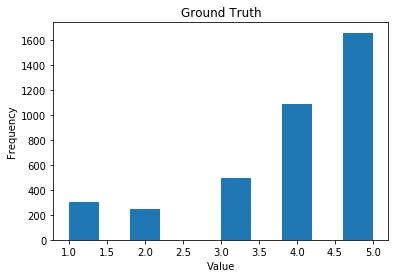

In [0]:
getHistogram('ratingScore', 'Ground Truth')

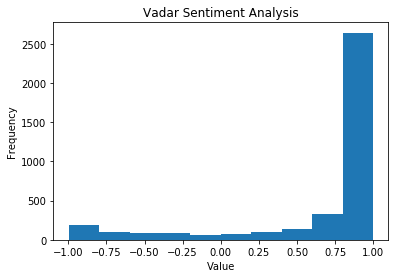

In [0]:
getHistogram('vader', 'Vadar Sentiment Analysis')

groud truth rating 2 has the lowest frequency/observation.

Overwhelmingly majority of the reviews has 0.75+ vadar score.


### a b) Show a histogram of the number of reviews per hotel. Do you notice any interesting trends? Are these expected?


In [0]:
# get review number
data=[]
for i in hotelDf.hotelName.unique():
  data.append([i,hotelDf[hotelDf["hotelName"] == i].shape[0]])
review_count_df = pandas.DataFrame(data)

Text(0.5, 1.0, '# of Reviews for each hotel')

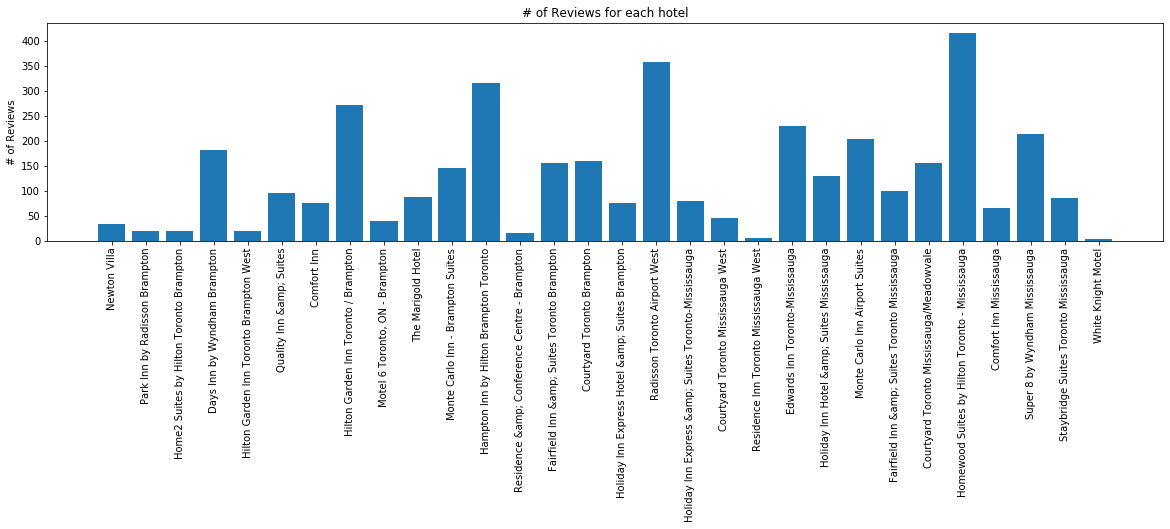

In [0]:
# plot a histogram
plt.figure(figsize=(20,4))
bar_number = range(len(pandas.DataFrame(data)[0].values))
plt.bar(bar_number,pandas.DataFrame(data)[1].values, align='center')
plt.xticks(bar_number, pandas.DataFrame(data)[0].values, rotation = 90)
plt.ylabel('# of Reviews')
plt.title('# of Reviews for each hotel')

Almost all hotels have review number greater than 50. And higher number of reviews generally imply that more people have been to that hotel and it is a generally good hotel(with good rating or reviews)

### b a) In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of 5 side-by-side boxplots of these scores.


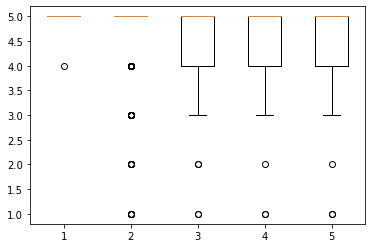

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

h1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
h2 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
h3 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
h4 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
h5 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [h1, h2, h3, h4, h5]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

In [0]:
h1

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    4
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    5
25    5
26    5
27    5
28    5
29    5
30    5
31    5
32    5
Name: ratingScore, dtype: int64

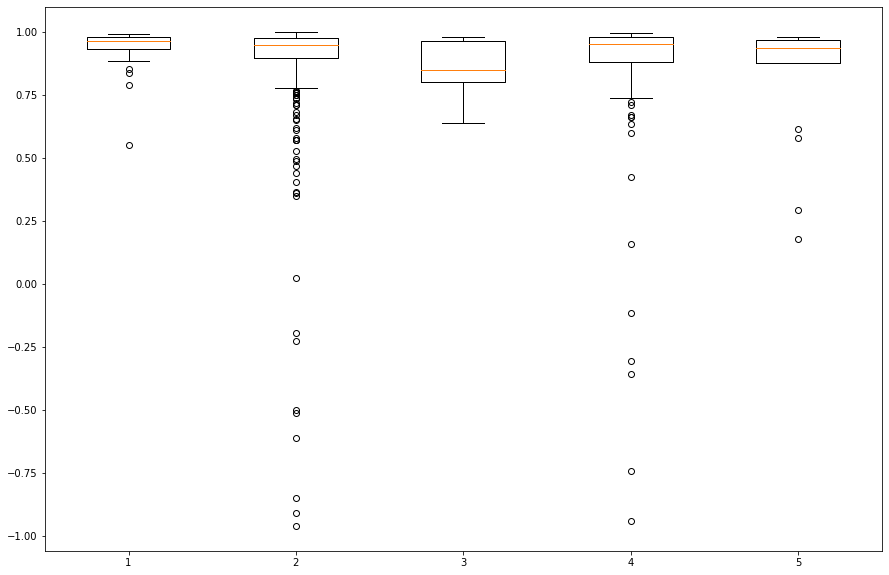

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfVd.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

h1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['vader']
h2 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['vader']
h3 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['vader']
h4 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['vader']
h5 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['vader']

data = [h1, h2, h3, h4, h5]
# multiple box plots on one figure
plt.figure(figsize=(15,10))
plt.boxplot(data)
plt.show()

### b b)Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.

In [0]:
# top 5 ranked according to star rating

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

array(['Newton Villa', 'Homewood Suites by Hilton Toronto - Mississauga',
       'Hampton Inn by Hilton Brampton Toronto',
       'Fairfield Inn &amp; Suites Toronto Mississauga',
       'Courtyard Toronto Mississauga West'], dtype=object)

In [0]:
r1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
r2 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
r3 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
r4 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
r5 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

v1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['vader']
v2 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['vader']
v3 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['vader']
v4 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['vader']
v5 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['vader']

top_rating = [r1,r2,r3,r4,r5]
top_vader = [v1,v2,v3,v4,v5]

In [0]:
# get a dataframe for ground truth mean and var
top_rating_array = []
for i in top_rating:
  top_rating_array.append([i.mean(), i.var()])
top_rating_df = pandas.DataFrame(top_rating_array, columns=['rating mean', 'rating var'])

# get a dataframe for vader score mean and var
top_vader_array = []
for i in top_vader:
  top_vader_array.append([i.mean(), i.var()])
top_vader_df = pandas.DataFrame(top_vader_array, columns=['vader mean', 'vader var'])

# merge the two dataframe together
top_rating_df[['vader mean', 'vader var']] = top_vader_df[['vader mean', 'vader var']]
col1 = pandas.DataFrame({"hotel":["top1","top2","top3","top4","top5"]}) 
top_rating_df["hotel"] = col1
top_rating_df = top_rating_df[["hotel","rating mean","rating var","vader mean","vader var"]]
top_rating_df

,hotel,rating mean,rating var,vader mean,vader var
0,top1,4.9696969697,0.0303030303,0.9369939394,0.0070446706
1,top2,4.6650602410,0.5228100809,0.8828484337,0.0576290306
2,top3,4.6317460317,0.4690526741,0.8308666667,0.1094098485
3,top4,4.5100000000,0.6766666667,0.8392600000,0.1150616251
4,top5,4.4888888889,0.9828282828,0.7454466667,0.1980474621


### b c) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?


Boxplot is more informative. The table only shows the means and variance. The boxplot shows max, min, 25% quartile, 75% quartile and the median value. From the boxplot, we can easily visualize the distribution of the data.

## c a) Show both a scatterplot and heatmap of ground truth score(star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star rating vs. Vader sentiment scores? What does this tell you about human rating and/or Vader sentiment analysis. 

Text(0.5, 0, 'Vader Score')

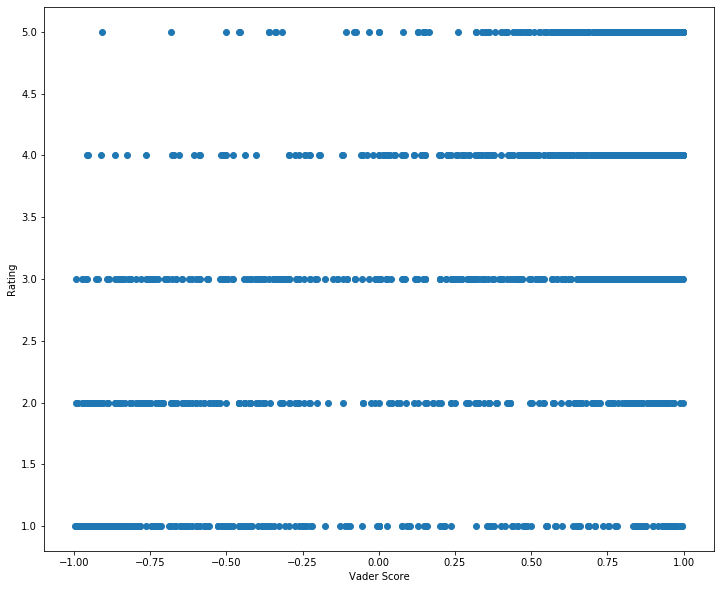

In [0]:
plt.figure(figsize=(12,10))
y = finaldf['ratingScore'].values
x = finaldf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

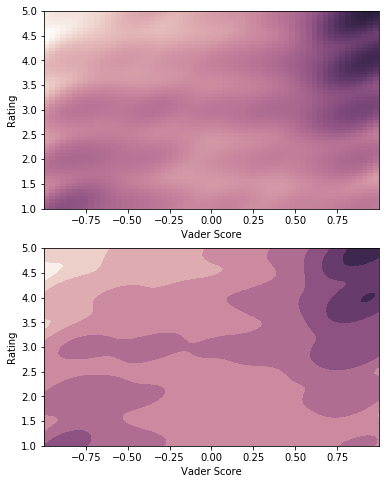

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

The trend is that high ground truth rating score usually means high vader scores, lower ground truth score usually means with low vader socre. However, average ground truth(rating = 3) ratings may have either high or low vader socres. That's may because neutral reviews will contain both positive and negative sentiments.

## c b) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Are there any trends? 

In [0]:
review_len=[]
list_temp = finaldf["reviewCol"].tolist()
for i in range(len(list_temp)):
  review_len.append(len(list_temp[i]))
review_len = np.asarray(review_len)

In [0]:
review_len

array([996, 255, 372, ..., 725, 482, 444])

Text(0.5, 0, 'Length of Review')

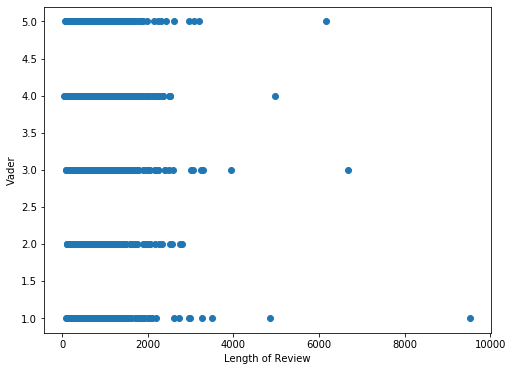

In [0]:
plt.figure(figsize=(8,6))
y = finaldf['ratingScore'].values
plt.plot(review_len, y,"o")
plt.ylabel('Vader')
plt.xlabel('Length of Review')

Text(0.5, 0, 'Length of Review')

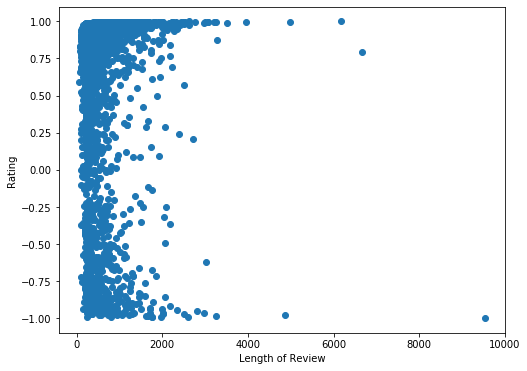

In [0]:
plt.figure(figsize=(8,6))
y = finaldf['vader'].values
plt.plot(review_len, y,"o")
plt.ylabel('Rating')
plt.xlabel('Length of Review')

In [0]:
from scipy.stats.kde import gaussian_kde
x = review_len
y = finaldf['ratingScore'].values
# y = finaldf['vader'].values
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

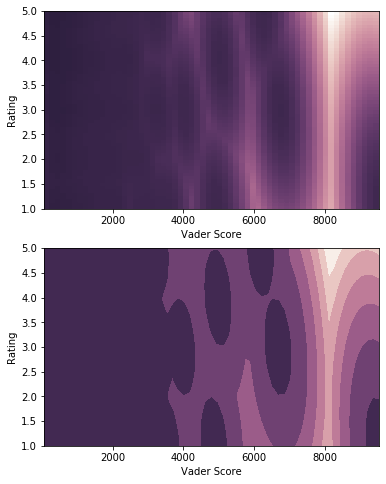

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

In [0]:
from scipy.stats.kde import gaussian_kde
x = review_len
# y = finaldf['ratingScore'].values
y = finaldf['vader'].values
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

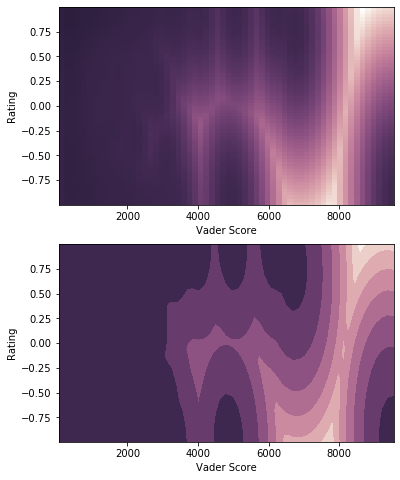

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

The trend is that positive ratings and reviews with good vader score tend to have longer reviews.

## c c) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Are there any trends?

In [0]:
hotel_score_Df = finaldf[['hotelName','ratingScore','vader']]

In [0]:
hotel_score_avg_Df = hotel_score_Df.groupby("hotelName", as_index=True).mean()
hotel_score_avg_Df

,ratingScore,vader
hotelName,,
Comfort Inn,3.8400000000,0.6183213333
Comfort Inn Mississauga,3.7076923077,0.6822292308
Courtyard Toronto Brampton,3.9562500000,0.7224450000
Courtyard Toronto Mississauga West,4.4888888889,0.7454466667
Courtyard Toronto Mississauga/Meadowvale,3.9419354839,0.6931490323
Days Inn by Wyndham Brampton,3.7032967033,0.5805357143
Edwards Inn Toronto-Mississauga,3.4585152838,0.5025646288
Fairfield Inn &amp; Suites Toronto Brampton,3.8838709677,0.6423587097
Fairfield Inn &amp; Suites Toronto Mississauga,4.5100000000,0.8392600000


In [0]:
review_count_df.rename(columns={0: "hotelName", 1: "review count"}, inplace = True)

In [0]:
q5_df = pandas.merge(hotel_score_avg_Df, review_count_df, on='hotelName', how='inner')

In [0]:
q5_df

,hotelName,ratingScore,vader,review count
0,Comfort Inn,3.8400000000,0.6183213333,75
1,Comfort Inn Mississauga,3.7076923077,0.6822292308,65
2,Courtyard Toronto Brampton,3.9562500000,0.7224450000,160
3,Courtyard Toronto Mississauga West,4.4888888889,0.7454466667,45
4,Courtyard Toronto Mississauga/Meadowvale,3.9419354839,0.6931490323,155
5,Days Inn by Wyndham Brampton,3.7032967033,0.5805357143,182
6,Edwards Inn Toronto-Mississauga,3.4585152838,0.5025646288,229
7,Fairfield Inn &amp; Suites Toronto Brampton,3.8838709677,0.6423587097,155
8,Fairfield Inn &amp; Suites Toronto Mississauga,4.5100000000,0.8392600000,100
9,Hampton Inn by Hilton Brampton Toronto,4.6317460317,0.8308666667,315


Text(0.5, 0, 'Length of Review')

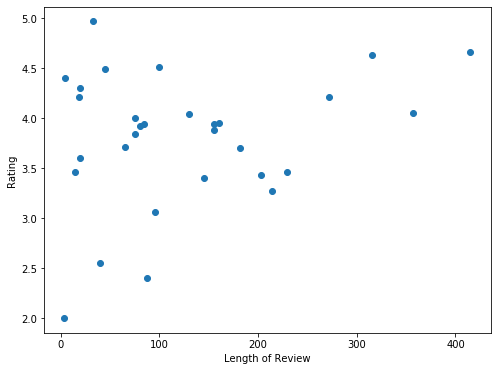

In [0]:
plt.figure(figsize=(8,6))
y = q5_df.ratingScore.values
x = q5_df["review count"].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Length of Review')

Text(0.5, 0, 'Length of Review')

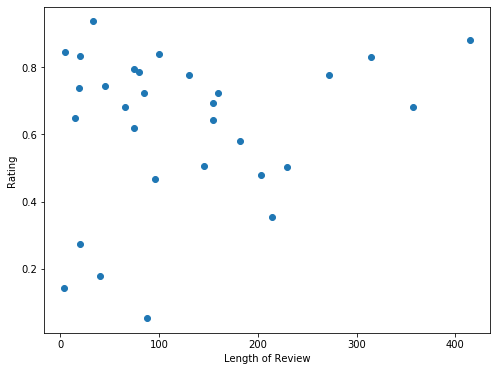

In [0]:
plt.figure(figsize=(8,6))
y =  q5_df["vader"].values
x = q5_df["review count"].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Length of Review')

We can see that bottom is sparser than the top so the nicer hotel tend to have more reviews.